In [1]:
import sys
sys.path.insert(1, '../../Pipeline')

import imp
import utils
imp.reload(utils)
from utils import *

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

try:
    from jupyterthemes import jtplot
    jtplot.style()
except:
    pass

ip = pd.read_csv('../../../data/cleandata/Info pluviometricas/Merged Data/merged.csv',
                 sep = ';',
                 dtype = {'Local_0': object, 'Local_1':object,
                          'Local_2':object,  'Local_3':object})

print(ip.columns)
ip.head()

Index(['Data_Hora', 'index', 'UmidadeRelativa_0', 'PressaoAtmosferica_0',
       'TemperaturaDoAr_0', 'TemperaturaInterna_0', 'PontoDeOrvalho_0',
       'SensacaoTermica_0', 'RadiacaoSolar_0', 'DirecaoDoVento_0',
       'VelocidadeDoVento_0', 'Precipitacao_0', 'Local_0', 'UmidadeRelativa_1',
       'PressaoAtmosferica_1', 'TemperaturaDoAr_1', 'TemperaturaInterna_1',
       'PontoDeOrvalho_1', 'SensacaoTermica_1', 'RadiacaoSolar_1',
       'DirecaoDoVento_1', 'VelocidadeDoVento_1', 'Precipitacao_1', 'Local_1',
       'UmidadeRelativa_2', 'PressaoAtmosferica_2', 'TemperaturaDoAr_2',
       'TemperaturaInterna_2', 'PontoDeOrvalho_2', 'SensacaoTermica_2',
       'RadiacaoSolar_2', 'DirecaoDoVento_2', 'VelocidadeDoVento_2',
       'Precipitacao_2', 'Local_2', 'UmidadeRelativa_3',
       'PressaoAtmosferica_3', 'TemperaturaDoAr_3', 'TemperaturaInterna_3',
       'PontoDeOrvalho_3', 'SensacaoTermica_3', 'RadiacaoSolar_3',
       'DirecaoDoVento_3', 'VelocidadeDoVento_3', 'Precipitacao_3', 'Lo

,Data_Hora,index,UmidadeRelativa_0,PressaoAtmosferica_0,TemperaturaDoAr_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,DirecaoDoVento_0,...,PressaoAtmosferica_4,TemperaturaDoAr_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4,Local_4
0,2011-01-01 00:00:00,0.0,84.8,920.6,20.2,22.8,17.5,NaN,0.0,137.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
1,2011-01-01 00:15:00,1.0,84.1,920.3,20.1,22.8,17.4,NaN,0.0,76.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
2,2011-01-01 00:30:00,2.0,83.9,920.2,20.1,22.9,17.2,NaN,0.0,92.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
3,2011-01-01 00:45:00,3.0,83.5,919.9,20.2,22.9,17.3,NaN,0.0,133.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria
4,2011-01-01 01:00:00,4.0,84.0,919.9,20.1,22.8,17.3,NaN,0.0,151.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,Vitoria


In [17]:
ip['Data_Hora'] = pd.to_datetime(ip['Data_Hora'])
ip = ip.sort_values(by = 'Data_Hora')
ip.tail()

,Data_Hora,index,UmidadeRelativa_0,PressaoAtmosferica_0,TemperaturaDoAr_0,TemperaturaInterna_0,PontoDeOrvalho_0,SensacaoTermica_0,RadiacaoSolar_0,DirecaoDoVento_0,...,PressaoAtmosferica_4,TemperaturaDoAr_4,TemperaturaInterna_4,PontoDeOrvalho_4,SensacaoTermica_4,RadiacaoSolar_4,DirecaoDoVento_4,VelocidadeDoVento_4,Precipitacao_4,Local_4
306716,2019-09-30 23:00:00,302610.0,78.7,923.6,15.9,17.9,13.1,14.4,0.0,46.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vitoria
306717,2019-09-30 23:15:00,302611.0,78.8,923.5,15.9,18.0,13.1,14.0,0.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vitoria
306718,2019-09-30 23:30:00,302612.0,79.3,923.6,15.8,17.9,13.1,13.5,0.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vitoria
306719,2019-09-30 23:45:00,302613.0,80.7,923.5,15.5,17.8,13.2,12.0,0.0,54.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vitoria
306720,2019-10-01 00:00:00,302614.0,81.0,923.3,15.5,17.7,13.2,13.2,0.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vitoria


In [ ]:
"""
UmidadeRelativa
PressaoAtmosferica
TemperaturaDoAr
TemperaturaInterna
PontoDeOrvalho
SensacaoTermica
RadiacaoSolar
DirecaoDoVento
Precipitacao
""";

In [ ]:
"""VelocidadeDoVento"""

#### Umidade Relativa 

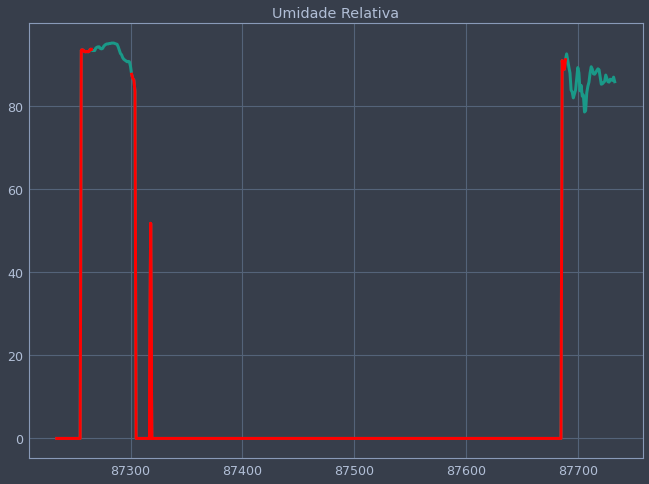

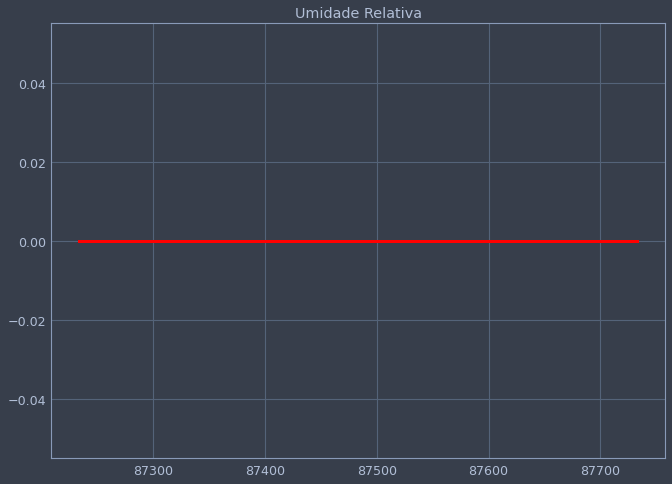

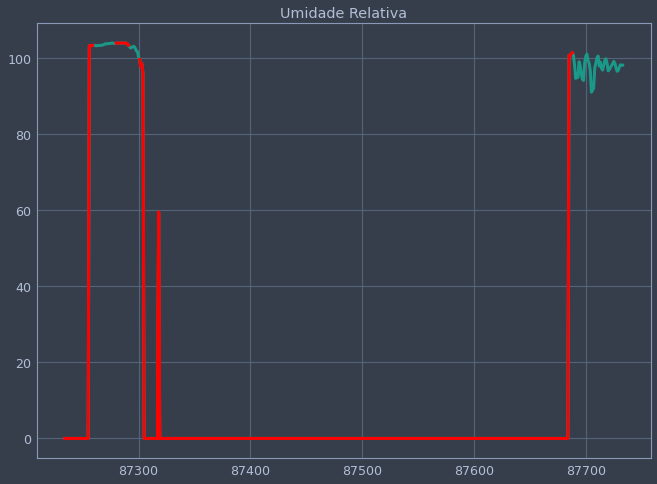

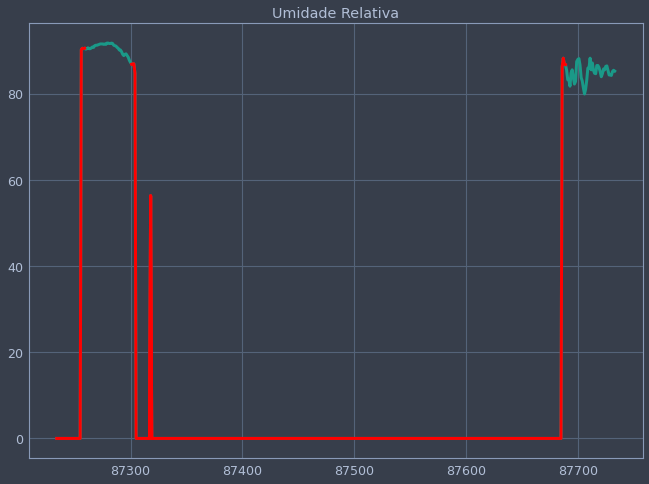

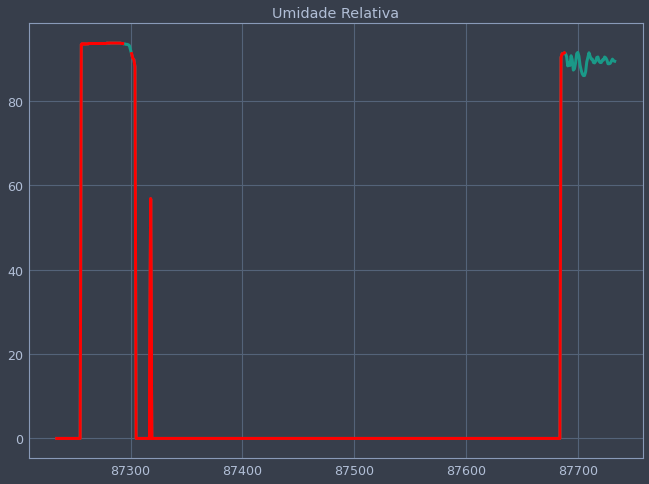

In [15]:
cols_um = [i for i in ip.columns if 'UmidadeRelativa' in i]
um = ip[cols_um].fillna(np.nan)
start, stop = 87234, 87234 + 500
for col in um.columns:
    peaks = derivative_threshold(um[col], 12, False, start, stop, lw = 2, figsize = (11, 15))
    zeros = derivative_zero(um[col], 3, False, False, start, stop, lw = 2, figsize = (11, 15))
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    error = regions_2_list(error_reg, len(peaks))
    plot_regions(um[col].fillna(0), error_reg, start, stop, plt_type = 'lines', 
                 title = 'Umidade Relativa', figsize = (11, 8), lw = 3)

#### PressaoAtmosferica

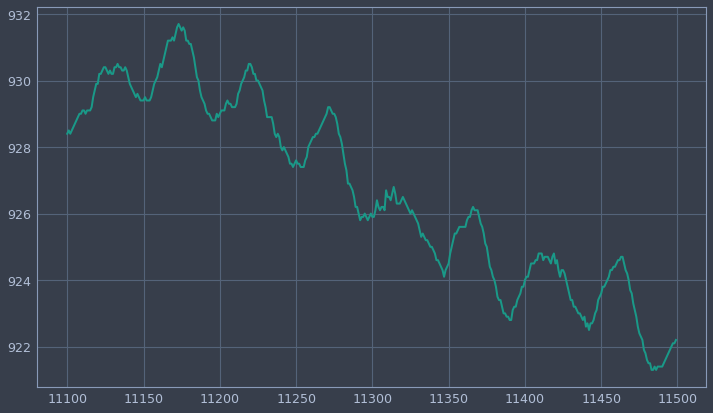

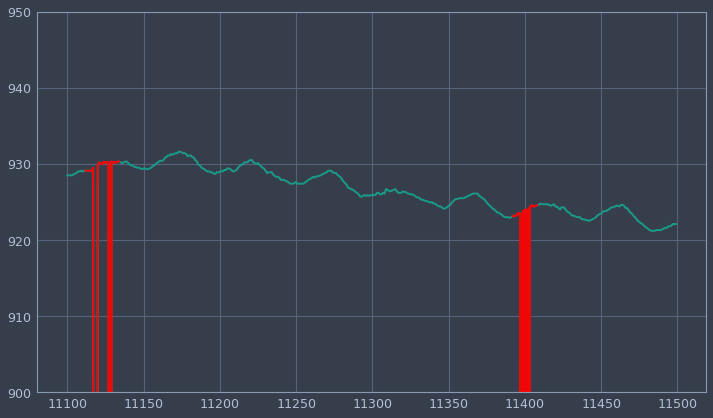

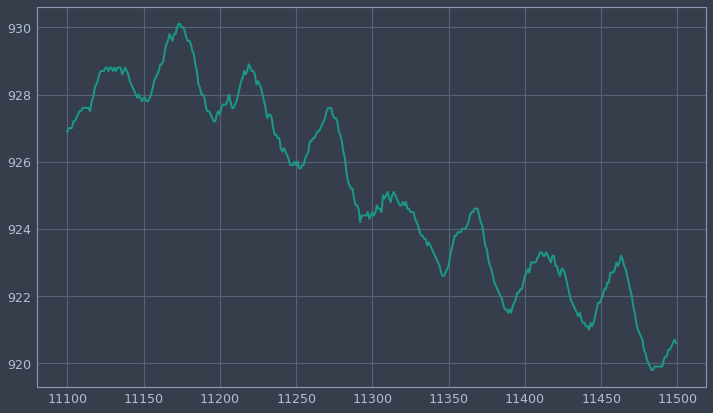

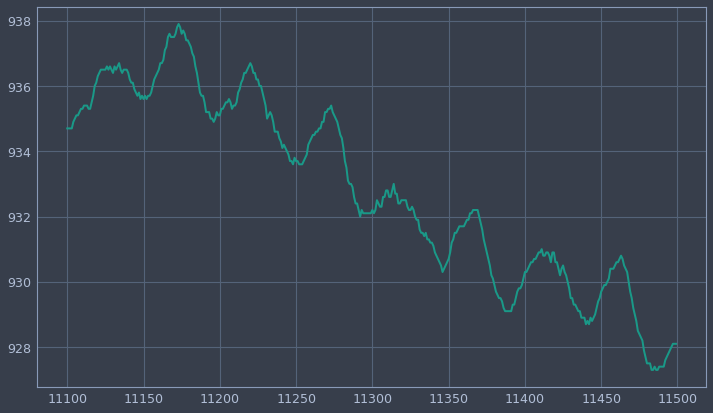

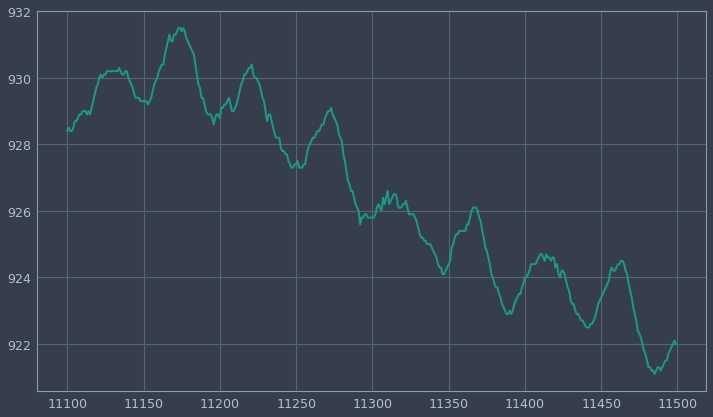

In [5]:
cols_um = [i for i in ip.columns if 'PressaoAtmosferica' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 50, False, 1000, 1500, ylim = [900, 1000])
    zeros = derivative_zero(um[col], 7, False, False, 1000, 1500, ylim = [900, 1000])
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(5, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 11100, 11500, plt_type = 'lines', ylim=[900, 950])

#### TemperaturaDoAr

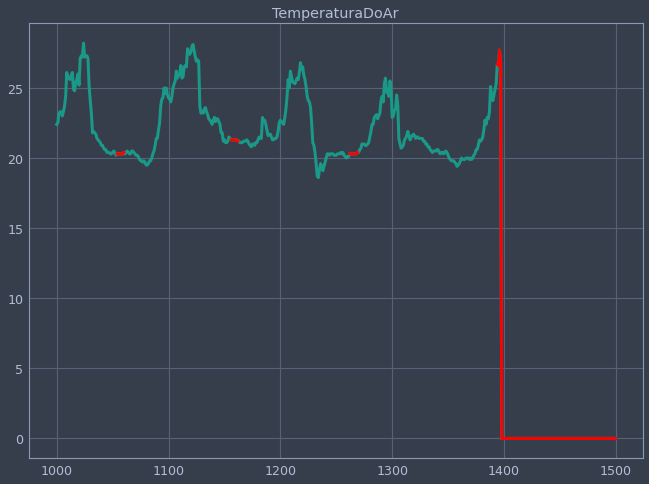

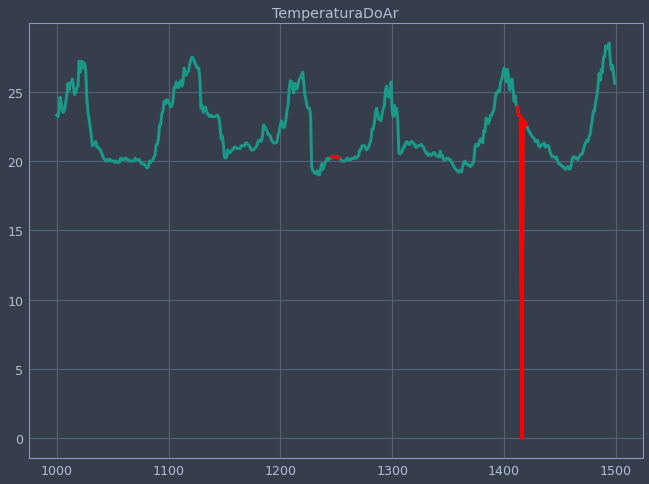

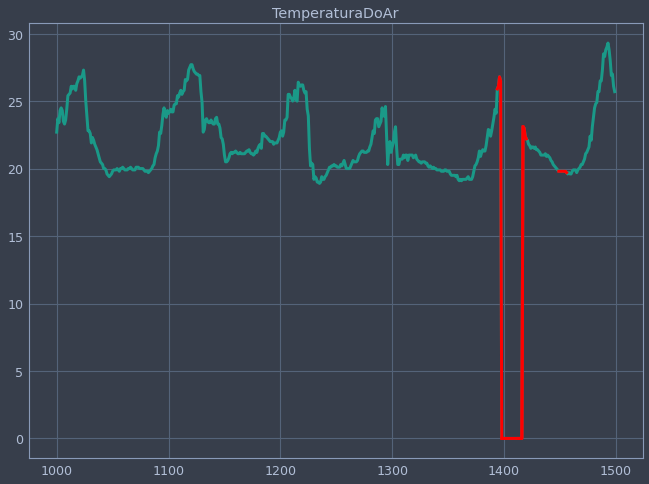

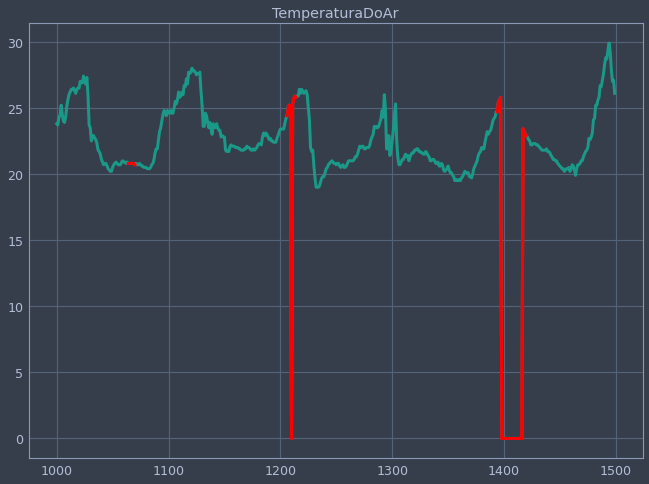

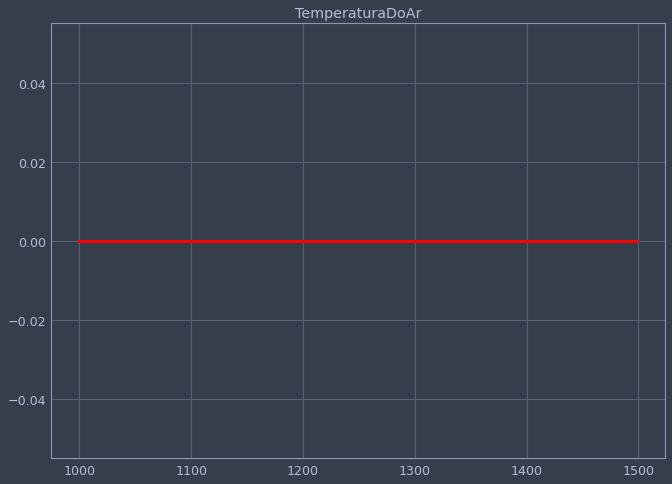

In [6]:
cols_um = [i for i in ip.columns if 'TemperaturaDoAr' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 6, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4,False, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 1000, 1500, plt_type = 'lines',
                 title = 'TemperaturaDoAr', figsize = (11, 8), lw = 3)

#### TemperaturaInterna

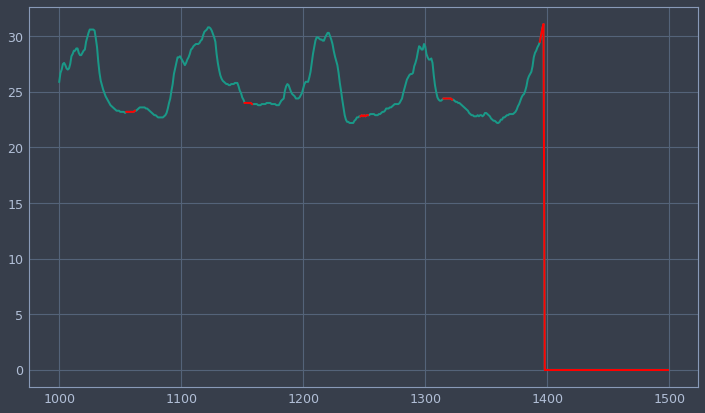

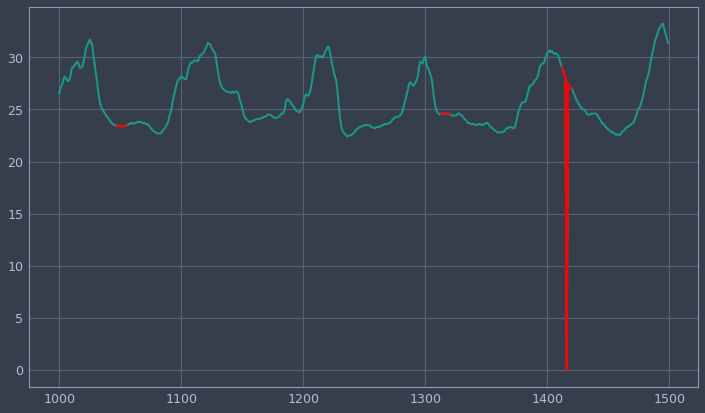

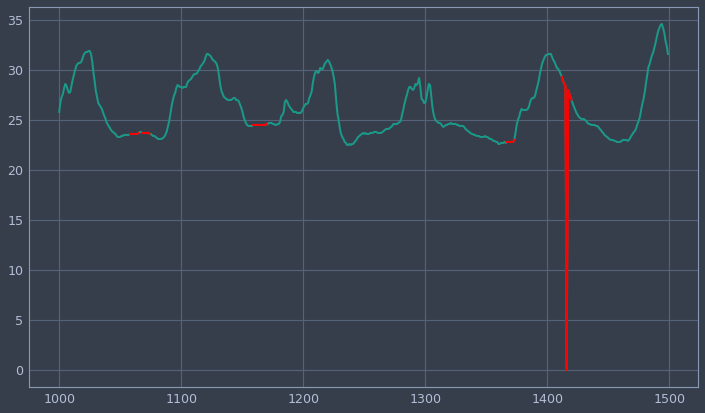

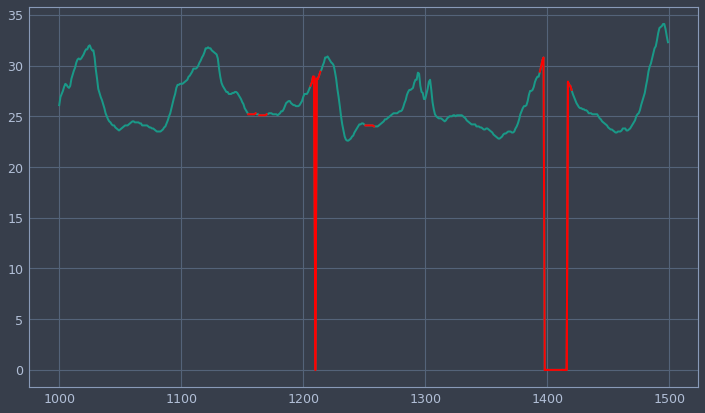

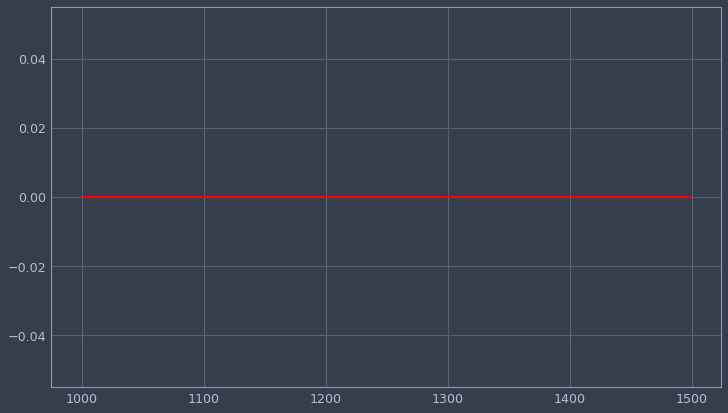

In [7]:
cols_um = [i for i in ip.columns if 'TemperaturaInterna' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 6, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4, False, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 1000, 1500, plt_type = 'lines')

#### PontoDeOrvalho

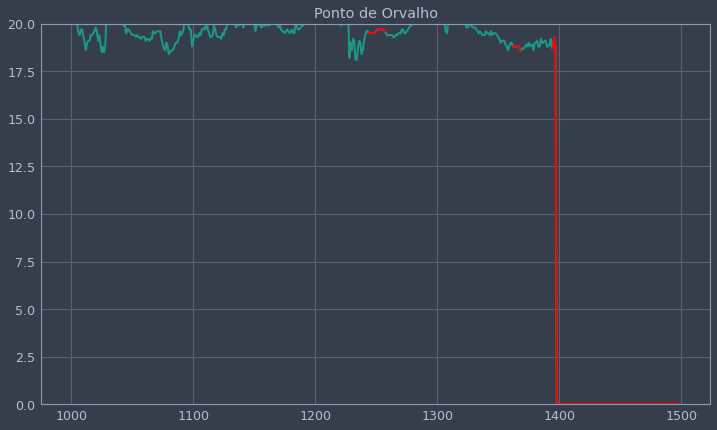

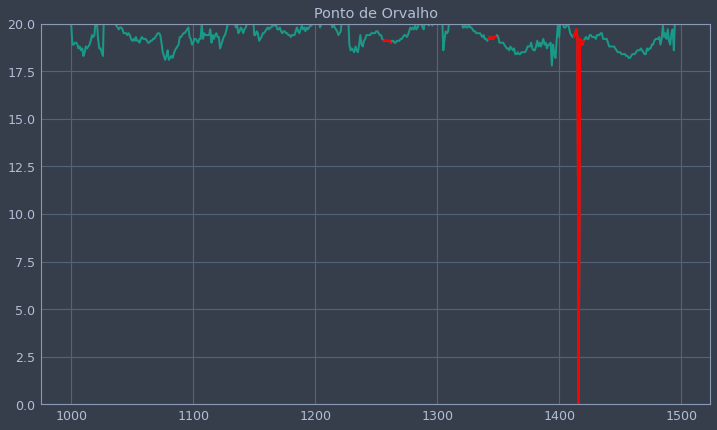

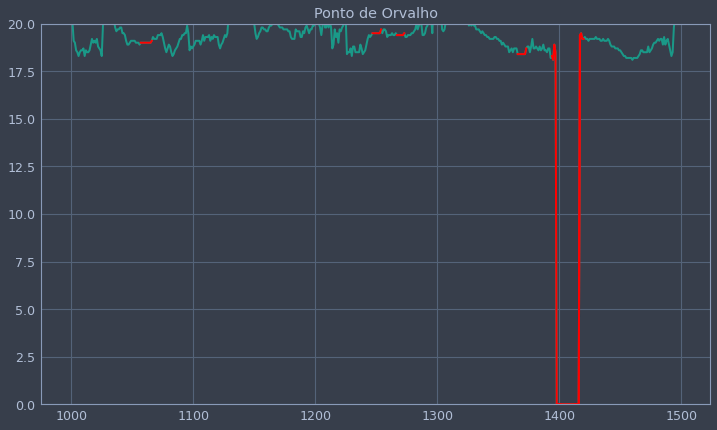

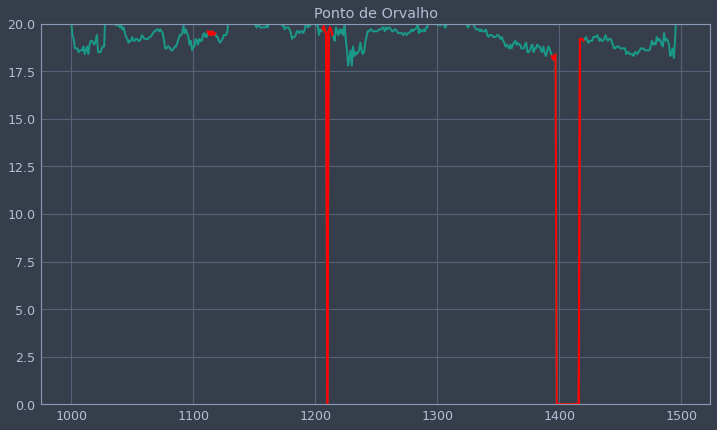

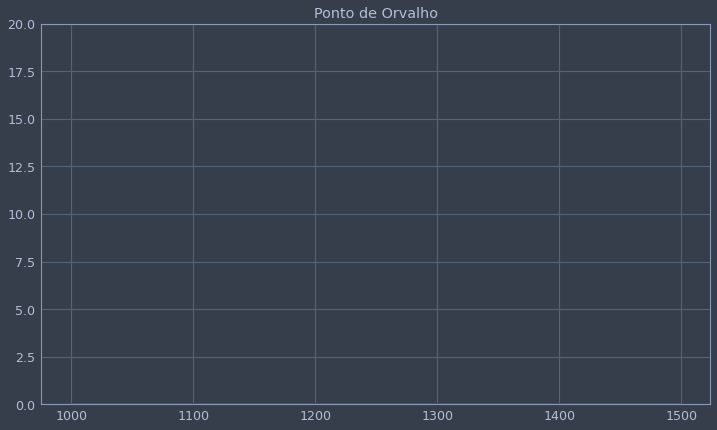

In [8]:
cols_um = [i for i in ip.columns if 'PontoDeOrvalho' in i]
um = ip[cols_um].fillna(np.nan)
um.head()

for col in um.columns:
    peaks = derivative_threshold(um[col], 3.5, False, 4000, 4500)
    zeros = derivative_zero(um[col], 4, False, False, 1000, 1500)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col], error_reg, 1000, 1500, plt_type = 'lines', ylim=[0, 20], title = 'Ponto de Orvalho')

#### SensacaoTermica

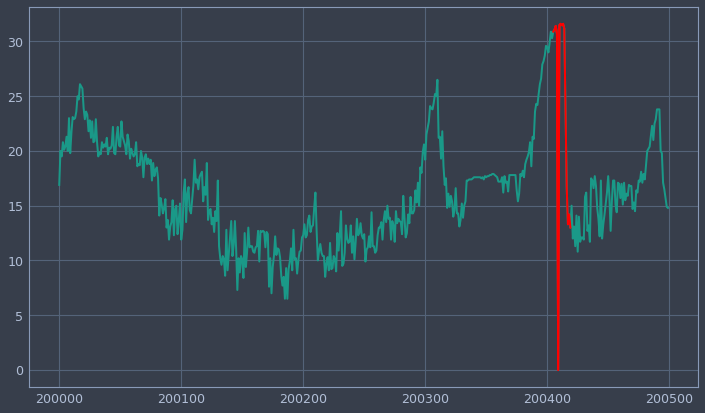

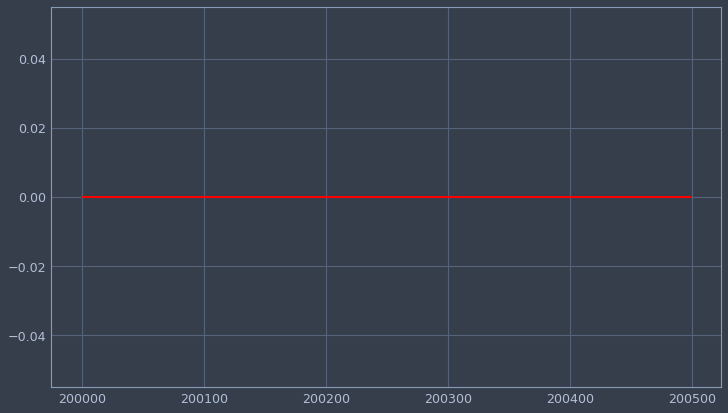

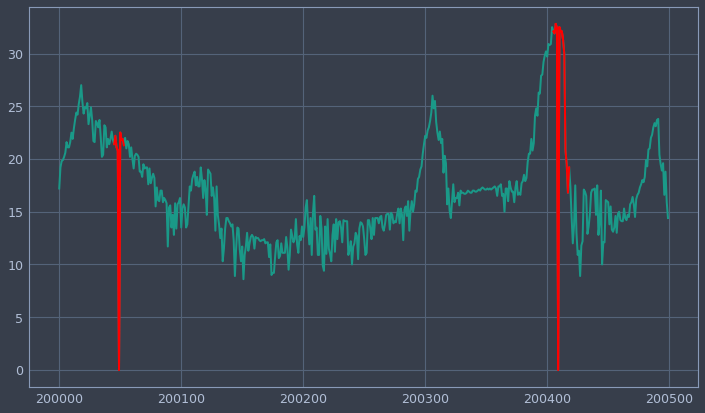

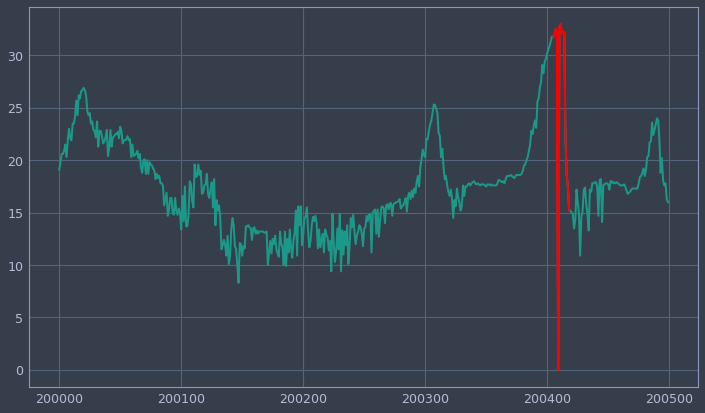

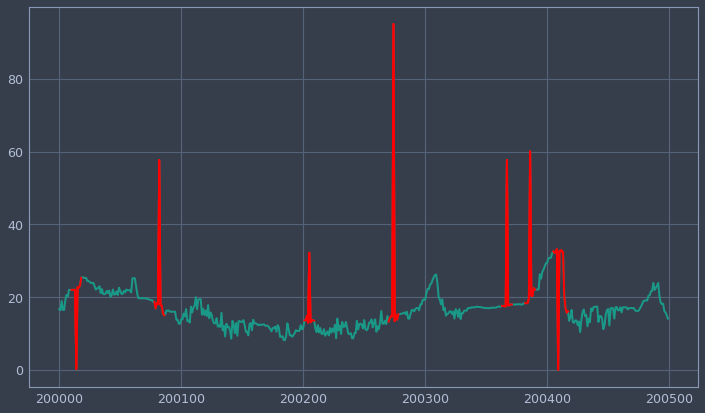

In [9]:
cols_um = [i for i in ip.columns if 'SensacaoTermica' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 200000, 200500
for col in um.columns:
    peaks = derivative_threshold(um[col].fillna(0), 4, False, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 10, False, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col].fillna(0), error_reg, start, stop, plt_type = 'lines')

#### RadiacaoSolar

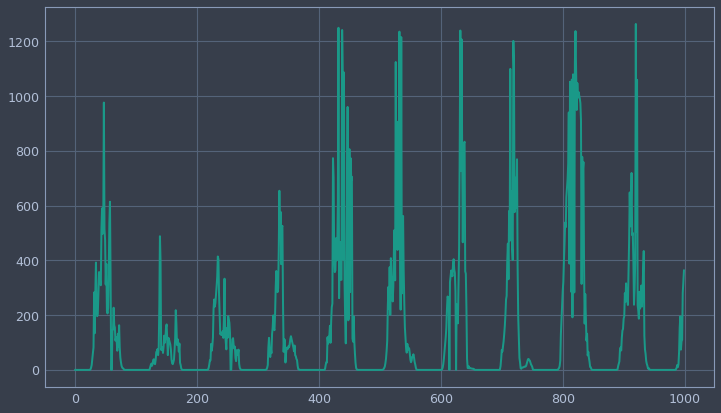

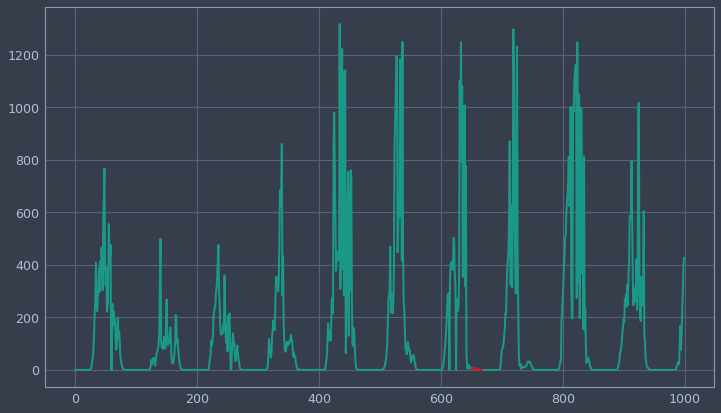

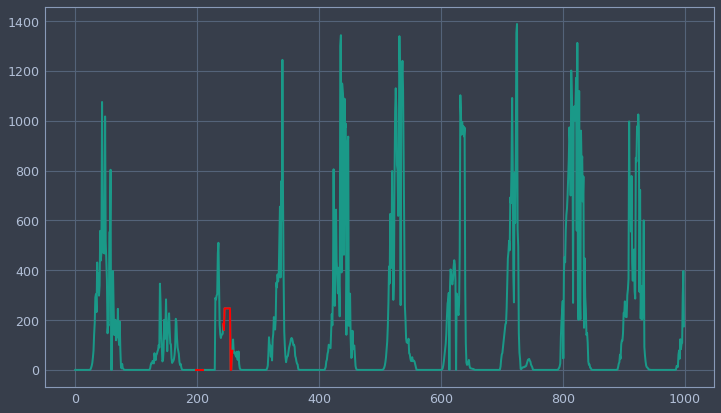

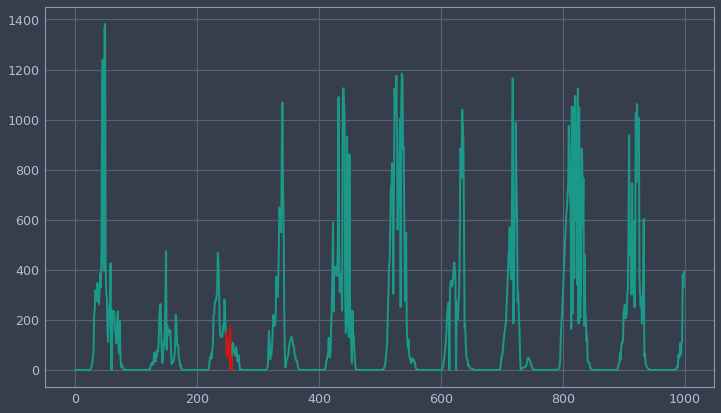

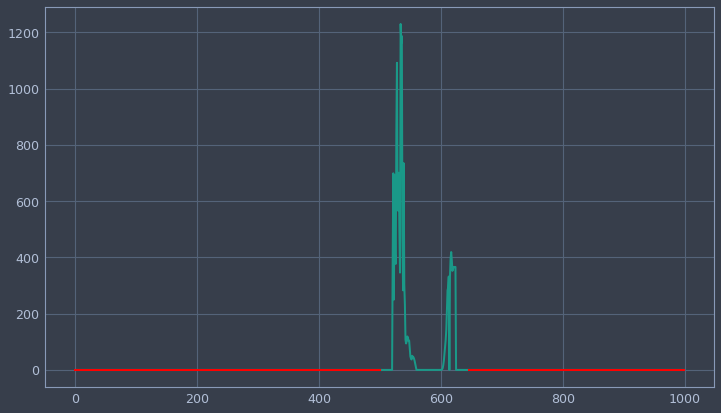

In [10]:
cols_um = [i for i in ip.columns if 'RadiacaoSolar' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 0, 1000
for col in um.columns:
    peaks = derivative_threshold(um[col].fillna(0), 750, False, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 50, False, plot = False, plt_start = start, plt_stop = stop)
    const_not_null = derivative_zero(um[col].fillna(0), 3, True, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or const_not_null[i] or peaks[i] for i in range(len(zeros))]
    # error = nans
    error_reg = list_2_regions(error)
    error_reg = increase_margins(5, error_reg, len(zeros))
    error = regions_2_list(error_reg, len(peaks))
    error = [nans[i] or error[i] for i in range(len(error))]
    error_reg = list_2_regions(error)
    plot_regions(um[col].fillna(0), error_reg, start, stop, plt_type = 'lines')

#### DirecaoDoVento

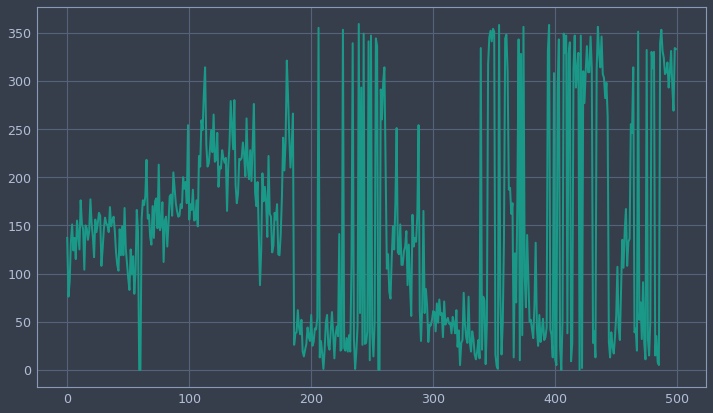

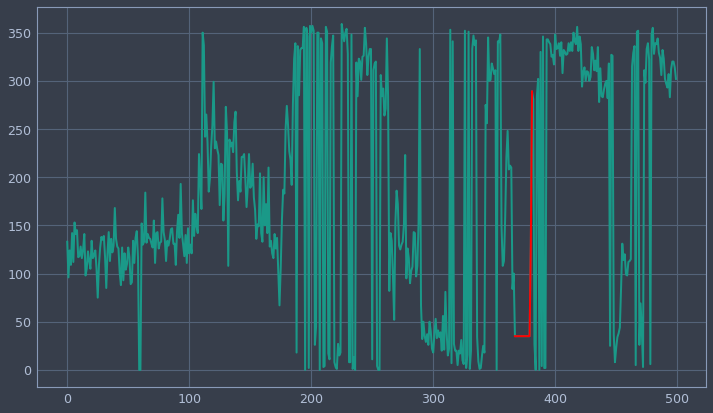

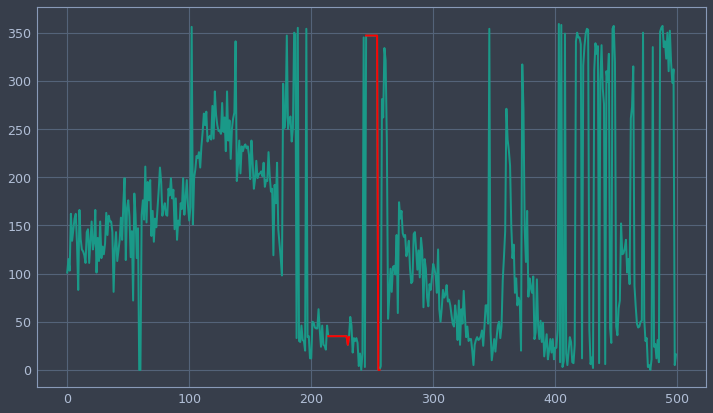

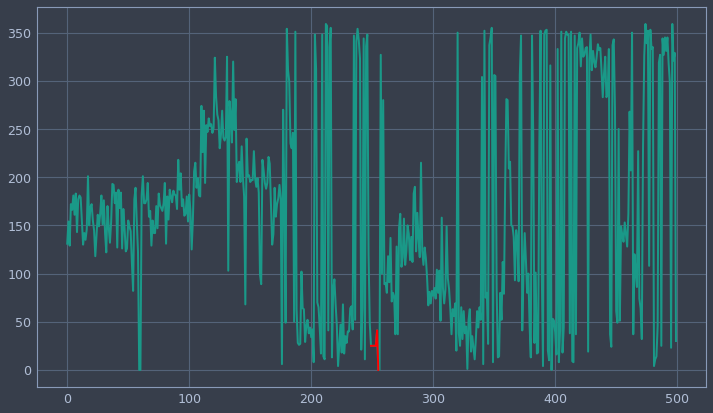

In [11]:
cols_um = [i for i in ip.columns if 'DirecaoDoVento' in i]
um = ip[cols_um]
um.head()
start, stop = 0, 0 + 500
for col in um.columns[:-1]:
    #peaks = derivative_threshold(um[col].fillna(0), 120, True, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 3, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or nans[i] for i in range(len(zeros))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(zeros))
    plot_regions(um[col], error_reg, start, stop, plt_type = 'lines')

#### Velocidade do Vento

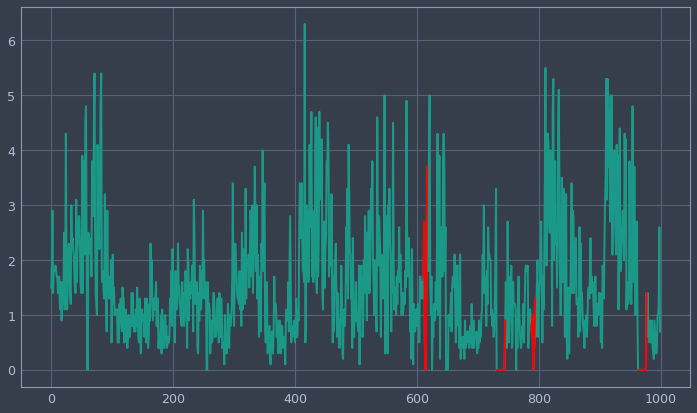

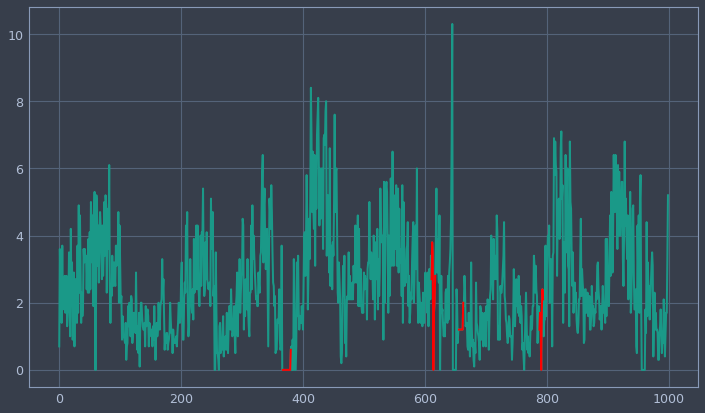

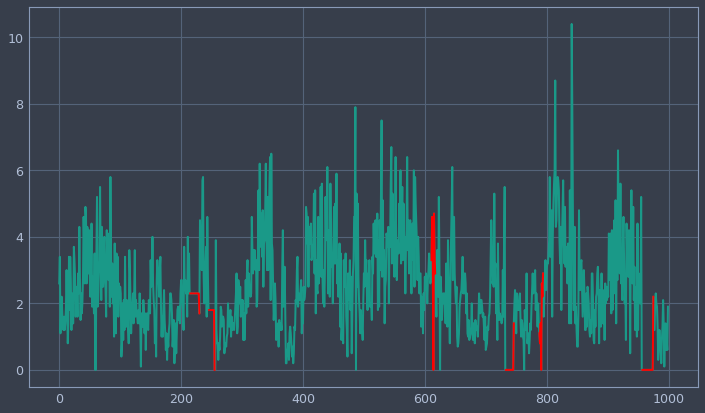

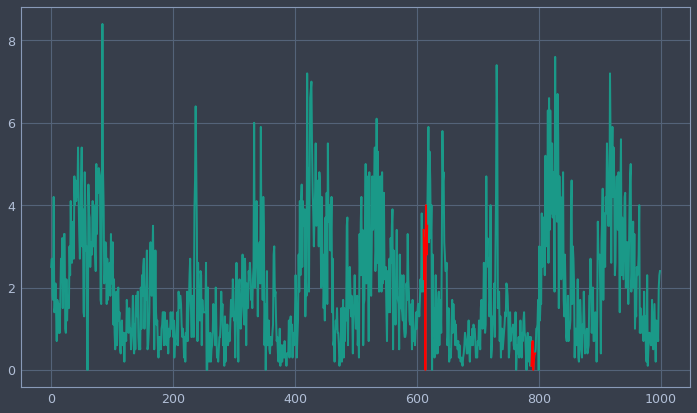

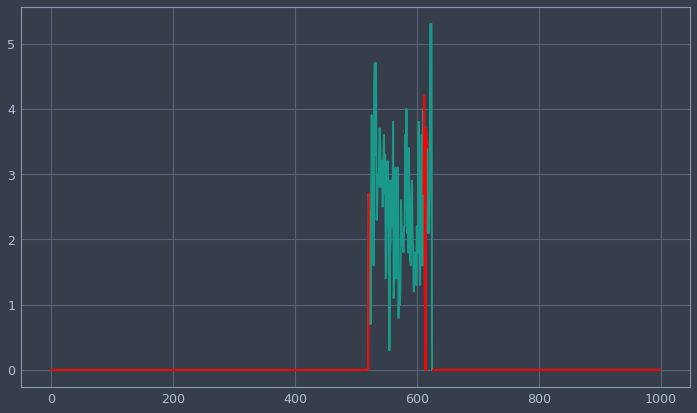

In [12]:
cols_um = [i for i in ip.columns if 'VelocidadeDoVento' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 0, 1000
for col in um.columns:
    peaks = derivative_threshold(um[col], 8, False, start, stop)
    zeros = derivative_zero(um[col].fillna(0), 5, False, start, stop)
    nans = um[col].isna()
    error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    error_reg = list_2_regions(error)
    error_reg = increase_margins(3, error_reg, len(peaks))
    plot_regions(um[col].fillna(0), error_reg, start, stop, plt_type = 'lines')

#### Precipitacao

In [ ]:
cols_um = [i for i in ip.columns if 'Precipitacao' in i]
um = ip[cols_um].fillna(np.nan)
um.head()
start, stop = 15000, 20000
max_ = 0
for col in um.columns[:-1]:
    print(um[col].nlargest(5))

    #zeros = derivative_zero(um[col].fillna(0), 10, False, start, stop)
    #nans = um[col].isna()
    #error = [zeros[i] or peaks[i] or nans[i] for i in range(len(peaks))]
    #error_reg = list_2_regions(error)
    #error_reg = increase_margins(3, error_reg, len(peaks))
    #plot_regions(um[col].fillna(0), error_reg, len(um[col]), start, stop, plt_type = 'lines')